In [1]:
import h5py as hdf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import glob 
import seaborn as sns
import os
import netCDF4 as cdf
from mpl_toolkits.basemap import Basemap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def plot_rectangle(bmap, lonmin,lonmax,latmin,latmax):
    xs = [lonmin,lonmax,lonmax,lonmin,lonmin]
    ys = [latmin,latmin,latmax,latmax,latmin]
    bmap.plot(xs, ys,latlon = True,color='red')

In [3]:
from mpl_toolkits import axes_grid1
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [4]:
# With 1000hpa refset
level3_2009_1  = '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level3_gome2/2009/01_1000Refset/SIFTER2_M02_L3_01_2009.nc'
data           = cdf.Dataset(level3_2009_1)
fs_2009_01_1   = np.ma.masked_invalid(data.variables['Chl_F_monthly'][:]*1000)
fs_2009_01v2_1 = np.ma.masked_invalid(data.variables['Chl_F_monthly_v2'][:]*1000)

In [5]:
# With 700hPa refset
level3_2009  = '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level3_gome2/2009/01/SIFTER2_M02_L3_01_2009.nc'
data         = cdf.Dataset(level3_2009)
fs_2009_01   = np.ma.masked_invalid(data.variables['Chl_F_monthly'][:]*1000)
fs_2009_01v2 = np.ma.masked_invalid(data.variables['Chl_F_monthly_v2'][:]*1000)

level3_200907= '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level3_gome2/2009/07/SIFTER2_M02_L3_07_2009.nc'
data07       = cdf.Dataset(level3_200907)
fs_2009_07   = np.ma.masked_invalid(data07.variables['Chl_F_monthly'][:]*1000)
fs_2009_07v2 = np.ma.masked_invalid(data07.variables['Chl_F_monthly_v2'][:]*1000)
#print data#.variables.keys(),data

In [6]:
# Maurits
level3_2009_k  = '/usr/people/kooreman/nobackup/data_SIF/M02/SIFTER2/Level3/2009/SIFTER2_M02_L3_01_2009.nc'
data_k         = cdf.Dataset(level3_2009_k)
fs_2009_01_k   = np.ma.masked_invalid(data_k.variables['Chl_F_monthly'][:]*1000)
fs_2009_01v2_k = np.ma.masked_invalid(data_k.variables['Chl_F_monthly_v2'][:]*1000)

level3_200907_k= '/usr/people/kooreman/nobackup/data_SIF/M02/SIFTER2/Level3/2009/SIFTER2_M02_L3_07_2009.nc'
data_k07       = cdf.Dataset(level3_200907_k)
fs_2009_07_k   = np.ma.masked_invalid(data_k07.variables['Chl_F_monthly'][:]*1000)
fs_2009_07v2_k = np.ma.masked_invalid(data_k07.variables['Chl_F_monthly_v2'][:]*1000)

In [9]:
level3_2009_All  = '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level3_gome2/2009/01_AllRefset/SIFTER2_M02_L3_01_2009.nc'
data_All         = cdf.Dataset(level3_2009_All)
fs_2009_01_All   = np.ma.masked_invalid(data_All.variables['Chl_F_monthly'][:]*1000)
fs_2009_01v2_All = np.ma.masked_invalid(data_All.variables['Chl_F_monthly_v2'][:]*1000)

level3_2009_All  = '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level3_gome2/2009/07_AllRefset/SIFTER2_M02_L3_07_2009.nc'
data_All         = cdf.Dataset(level3_2009_All)
fs_2009_07_All   = np.ma.masked_invalid(data_All.variables['Chl_F_monthly'][:]*1000)
fs_2009_07v2_All = np.ma.masked_invalid(data_All.variables['Chl_F_monthly_v2'][:]*1000)

In [15]:
topo          = pd.read_csv('/usr/people/botiabo/03_HighScenesNDVI/SRTM_RAMP2_TOPO_2000-02-11_rgb_720x360.CSV','r',delimiter=',',header=None)
topo_mask_nan = np.array(topo.where(topo%99999))
topo_mask     = ma.masked_array(topo_mask_nan,np.isnan(topo_mask_nan))

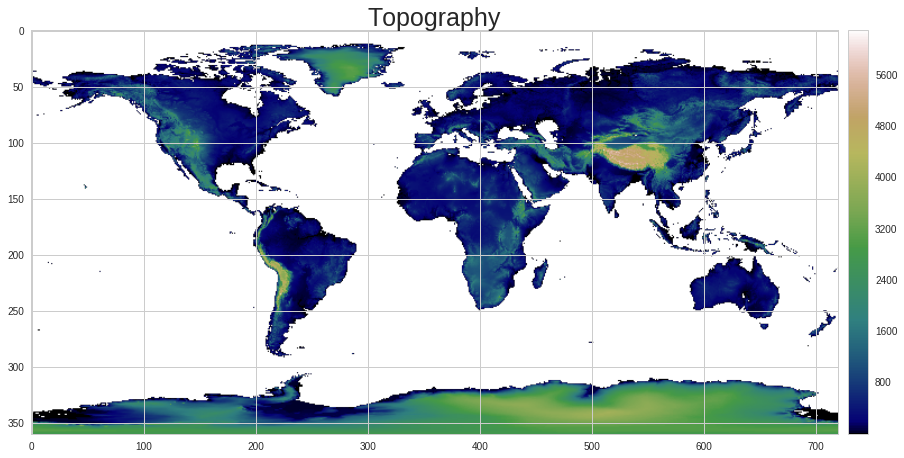

In [16]:
fig = plt.figure(1, figsize(15,15))
sns.set_style('whitegrid')
im = plt.imshow(topo_mask_nan,cmap='gist_earth')
cb = add_colorbar(im)
#cb.set_label('Albedo [-]',fontsize=18)
plt.title('Topography',fontsize=25)

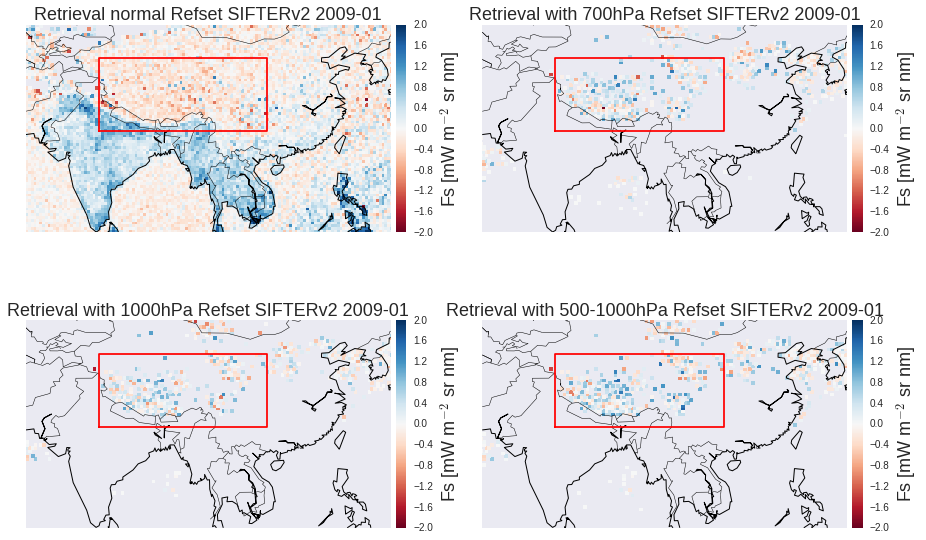

In [15]:
zoom = True
v2   = True

lllat        = 8
urlat        = 45
lllon        = 65
uprlon       = 130

xx, yy   = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
fig      = plt.figure(1,figsize=(15,15))

if v2: 
    plot1 = fs_2009_01v2_k  
    plot2 = fs_2009_01v2
    plot3 = fs_2009_01v2_1
    plot4 = fs_2009_01v2_All
if not v2: 
    plot1 = fs_2009_01_k  
    plot2 = fs_2009_01
    plot3 = fs_2009_01_1
    plot4 = fs_2009_01_All
    
if not zoom:
    map   = Basemap(projection='cyl', lat_0=0, lon_0=0)
if zoom: 
    map   = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)

ax = fig.add_subplot(321)
if not v2: ax.set_title('Retrieval normal Refset 2009-01',fontsize=22)
if v2: ax.set_title('Retrieval normal Refset SIFTERv2 2009-01',fontsize=18)
imm = map.pcolormesh(xx,yy,plot1,cmap='RdBu') # GnBU,Jet,coolwarm
imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
#map.drawmeridians(range(0, 360, 10))
#map.drawparallels(range(-180, 180, 10))
plot_rectangle(map,78,108,26,39)

ax = fig.add_subplot(322)
if not v2: ax.set_title('Retrieval with 700hPa Refset 2009-01',fontsize=22)
if v2: ax.set_title('Retrieval with 700hPa Refset SIFTERv2 2009-01',fontsize=18)
imm = map.pcolormesh(xx,yy,plot2,cmap='RdBu') # YlGnBu,GnBU,Jet
imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
#map.drawmeridians(range(0, 360, 10))
#map.drawparallels(range(-180, 180, 10))
plot_rectangle(map,78,108,26,39)


ax = fig.add_subplot(323)
if not v2: ax.set_title('Retrieval with 700hPa Refset 2009-01',fontsize=22)
if v2: ax.set_title('Retrieval with 1000hPa Refset SIFTERv2 2009-01',fontsize=18)
imm = map.pcolormesh(xx,yy,plot3,cmap='RdBu') # GnBU,Jet
imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
#map.drawmeridians(range(0, 360, 10))
#map.drawparallels(range(-180, 180, 10))
plot_rectangle(map,78,108,26,39)

ax = fig.add_subplot(324)
if not v2: ax.set_title('Retrieval with 500-1000hPa Refset 2009-01',fontsize=22)
if v2: ax.set_title('Retrieval with 500-1000hPa Refset SIFTERv2 2009-01',fontsize=18)
imm = map.pcolormesh(xx,yy,plot4,cmap='RdBu') # GnBU,Jet
imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
#map.drawmeridians(range(0, 360, 10))
#map.drawparallels(range(-180, 180, 10))
plot_rectangle(map,78,108,26,39)

#fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/GOME2a_Ret_SntheticRefsets.png',bbox_inches='tight',DPI=1000)
plt.show()

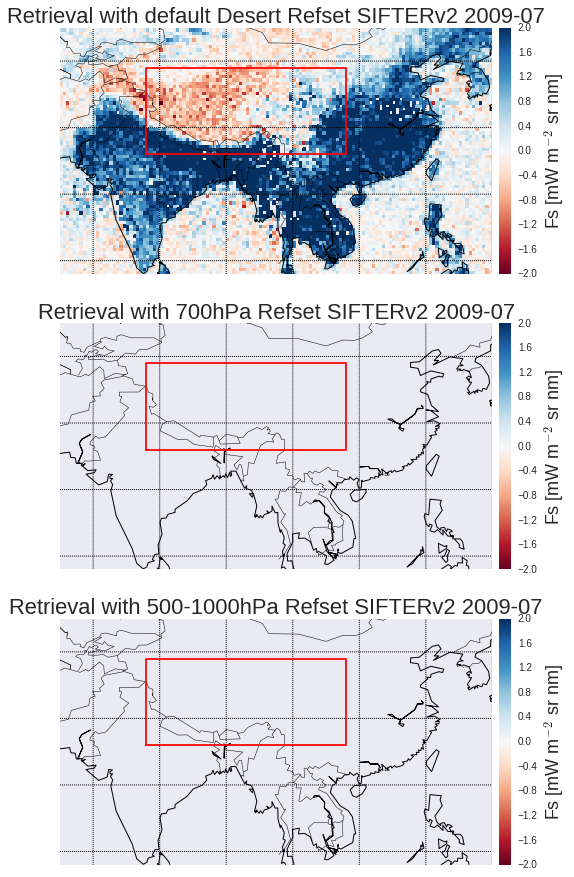

In [16]:
zoom = True
v2   = True

lllat        = 8
urlat        = 45
lllon        = 65
uprlon       = 130

xx, yy   = np.meshgrid(np.arange(-180,180,0.5),np.arange(-90,90,0.5))
fig      = plt.figure(1,figsize=(15,15))

if v2: 
    plot1 = fs_2009_07v2_k  
    plot2 = fs_2009_07v2
    plot3 = fs_2009_07v2_All
if not v2: 
    plot1 = fs_2009_07_k  
    plot2 = fs_2009_07
    plot3 = fs_2009_07_All
    
if not zoom:
    map   = Basemap(projection='cyl', lat_0=0, lon_0=0)
if zoom: 
    map   = Basemap(projection='cyl',llcrnrlat=lllat, urcrnrlat=urlat, llcrnrlon=lllon, urcrnrlon=uprlon)

ax = fig.add_subplot(311)
if not v2: ax.set_title('Retrieval with default Desert Refset 2009-07',fontsize=22)
if v2: ax.set_title('Retrieval with default Desert Refset SIFTERv2 2009-07',fontsize=22)
imm = map.pcolormesh(xx,yy,plot1,cmap='RdBu') # GnBU,Jet,coolwarm
imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-180, 180, 10))
plot_rectangle(map,78,108,26,39)

ax = fig.add_subplot(312)
if not v2: ax.set_title('Retrieval with 700hPa Refset 2009-07',fontsize=22)
if v2: ax.set_title('Retrieval with 700hPa Refset SIFTERv2 2009-07',fontsize=22)
imm = map.pcolormesh(xx,yy,plot2,cmap='RdBu') # GnBU,Jet
imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-180, 180, 10))
plot_rectangle(map,78,108,26,39)

ax = fig.add_subplot(313)
if not v2: ax.set_title('Retrieval with 500-1000hPa Refset 2009-07',fontsize=22)
if v2: ax.set_title('Retrieval with 500-1000hPa Refset SIFTERv2 2009-07',fontsize=22)
imm = map.pcolormesh(xx,yy,plot3,cmap='RdBu') # GnBU,Jet
imm.set_clim(vmin=-2, vmax=2)
cb        = add_colorbar(imm)
cb.set_label('Fs [mW m$^{-2}$ sr nm]',fontsize=18)
map.drawcoastlines()
map.drawcountries()
map.drawmeridians(range(0, 360, 10))
map.drawparallels(range(-180, 180, 10))
plot_rectangle(map,78,108,26,39)

plt.show()

In [26]:
path = ['/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level2_gome2/2009/01/',
        '/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level2_gome2/2009/07/',
       ]

{'boxes': [<matplotlib.lines.Line2D at 0x2b4a35263550>],
 'caps': [<matplotlib.lines.Line2D at 0x2b4a35279450>,
 'fliers': [<matplotlib.lines.Line2D at 0x2b4a35285750>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x2b4a35285110>],
 'whiskers': [<matplotlib.lines.Line2D at 0x2b4a35263710>,
  <matplotlib.lines.Line2D at 0x2b4a35263dd0>]}

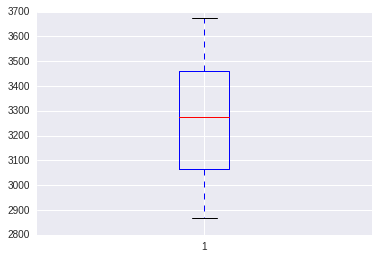

In [10]:
refset = '/usr/people/botiabo/botiabo/data_SIF/M02/Ref_sets/700hpa_desert_refset_noise'
data   = hdf.File(refset,'r')
height = np.array(data['barren(16.0, 30.0, -8.0, 29.0)/fluor_l1b_2009_01_01/height'][0])
plt.boxplot(height)

In [29]:
#Generating DF for both months 01,07 for maurits level2 data
path = ['/usr/people/kooreman/nobackup/data_SIF/M02/SIFTER2/Level2/2009/01/',
        '/usr/people/kooreman/nobackup/data_SIF/M02/SIFTER2/Level2/2009/07/'
       ]

for ii,dirbf in enumerate(path):
    print dirbf
    for fname in os.listdir(dirbf):
        data     = hdf.File(dirbf+fname,'r')
        autocorr = np.array(data['level2/autocorrelation'])
        
        if autocorr.shape[0] == 0: continue
            
        columns  = ['lat','lon','Fs','height','Autocorr','chi2']
        d        = np.array(np.ones((autocorr.shape[0],len(columns))))
        nameDf   = fname[15:25]+'Df'
        nameDf   = pd.DataFrame(data=d,columns=columns)

        lat      = np.array(data['level2/lat'])
        lon      = np.array(data['level2/lon'])
        Fs       = np.array(data['level2/param'])
        Fs       = np.array([item[0] for item in Fs])
        height   = np.array(data['level2/height'])
        chi2     = np.array(data['level2/chi2_red'])
        
        varss    = [lat,lon,Fs,height,autocorr,chi2]
        #print fname[15:25]
        for k,j in enumerate(columns):
            nameDf[j] = varss[k]
            nameDf.to_pickle('dataframes_gome2/kooreman%s'%(fname[15:25]))
            print os.chdir

/usr/people/kooreman/nobackup/data_SIF/M02/SIFTER2/Level2/2009/01/
/usr/people/kooreman/nobackup/data_SIF/M02/SIFTER2/Level2/2009/07/


In [17]:
#Generating DF for the retrieval with 1000hpa refset for 2009 01 and also for the All hpa refset

path = ['/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level2_gome2/2009/01_AllRefset/']

for ii,dirbf in enumerate(path):
    print dirbf
    for fname in os.listdir(dirbf):
        data     = hdf.File(dirbf+fname,'r')
        autocorr = np.array(data['level2/autocorrelation'])
        
        if autocorr.shape[0] == 0: continue
            
        columns  = ['lat','lon','Fs','height','Autocorr','chi2']
        d        = np.array(np.ones((autocorr.shape[0],len(columns))))
        nameDf   = fname[15:25]+'Df'
        nameDf   = pd.DataFrame(data=d,columns=columns)

        lat      = np.array(data['level2/lat'])
        lon      = np.array(data['level2/lon'])
        Fs       = np.array(data['level2/param'])
        Fs       = np.array([item[0] for item in Fs])
        height   = np.array(data['level2/height'])
        chi2     = np.array(data['level2/chi2_red'])
        
        varss    = [lat,lon,Fs,height,autocorr,chi2]
        #print fname[15:25]
        for k,j in enumerate(columns):
            nameDf[j] = varss[k]
            nameDf.to_pickle('dataframes_gome2/AllRefset-%s'%(fname[15:25]))

/usr/people/botiabo/botiabo/data_SIF/M02/SIFTER2/Level2_gome2/2009/01_AllRefset/


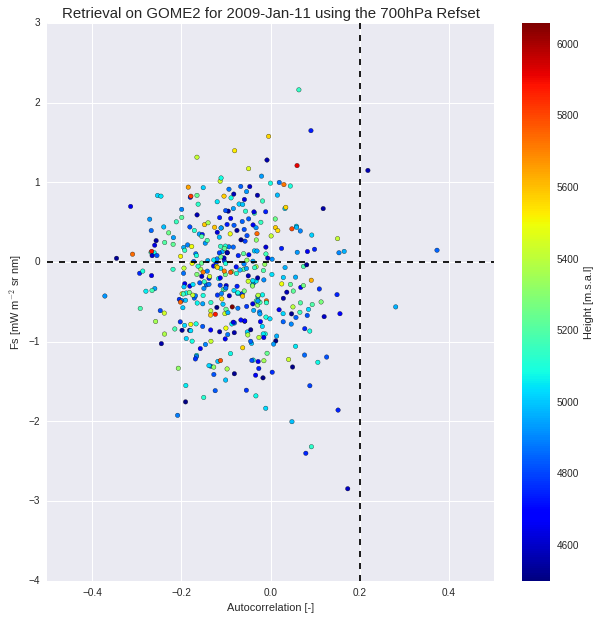

In [382]:
# Looking at the three dimensions for randoms days 
i = randint(1,32)
f = plt.figure(1, figsize = (10,10))

if i == 6:i+1
if i == 27:i+1
#if i == 20:i+1

if i<10: df = pd.read_pickle('dataframes_gome2/kooreman2009_01_0%i'%(i))
if i>9: df  = pd.read_pickle('dataframes_gome2/kooreman2009_01_%i'%(i))
    
height     = (df[df['height'] > 4500])

#plt.scatter(df['Autocorr'],df['Fs']*1000,c=df['height'],cmap='jet')
plt.scatter(height['Autocorr'],height['Fs']*1000,c=height['height'],cmap='jet')
#plt.ylim(-5,5)
#plt.xlim(-.4,.3)
plt.ylabel('Fs [mW m$^{-2}$ sr nm]')
plt.title('Retrieval on GOME2 for 2009-Jan-%i using the 700hPa Refset'%(i),loc='center',verticalalignment='baseline',fontsize=15)
plt.axhline(0,color='k',linestyle='--')
plt.axvline(0.2,color='k',linestyle='--')
cb = plt.colorbar()
cb.set_label('Height [m.s.a.l]')
plt.xlabel('Autocorrelation [-]')
plt.ylabel('Fs [mW m$^{-2}$ sr nm]')

#f.suptitle('Retrievals done using the All hpa refset (500-1000hpa)',fontsize=25)
plt.show()

In [23]:
#Grouping Fs, autocorr and height per day in df For kooreman and also for the All hpa refset for 200901
#

lllat   = 26
urlat   = 39
lllon   = 81
uprlon  = 108

#days_fs_k01       = pd.DataFrame(index=range(900),columns=range(1,32))
#days_autocorr_k01 = pd.DataFrame(index=range(900),columns=range(1,32))
#days_height_k01   = pd.DataFrame(index=range(900),columns=range(1,32))

days_fs_01_all       = pd.DataFrame(index=range(100),columns=range(1,32))
days_autocorr_01_all = pd.DataFrame(index=range(100),columns=range(1,32))
days_height_01_all  = pd.DataFrame(index=range(100),columns=range(1,32))

for day in range(1,32):
    #print day 
    if day == 6:continue
    if day == 27:continue#

    #if day<10: df = pd.read_pickle('dataframes_gome2/kooreman2009_01_0%i'%(day))
    #if day>9: df  = pd.read_pickle('dataframes_gome2/kooreman2009_01_%i'%(day))
    
    if day<10: df = pd.read_pickle('dataframes_gome2/AllRefset-2009_01_0%i'%(day))
    if day>9: df  = pd.read_pickle('dataframes_gome2/AllRefset-2009_01_%i'%(day))
        
    df2 = df.loc[ (df['lat']>=lllat) & (df['lat']<=urlat) & (df['lon']>=lllon) & (df['lon']<=uprlon) &
                 (df['height']>=2900) & (df['height']<=3600),['lat','lon','Fs','Autocorr','height']]
    
    df2.index = range(df2.shape[0])

    #days_fs_k01[day]        = df2['Fs']*1000
    #days_autocorr_k01[day]  = df2['Autocorr']
    #days_height_k01[day]    = df2['height']
    
    days_fs_01_all[day]       = df2['Fs']*1000
    days_autocorr_01_all[day] = df2['Autocorr']
    days_height_01_all[day]   = df2['height']
    
    

In [27]:
#Grouping Fs, autocorr and height per day in df kooreman for 200907

lllat   = 26
urlat   = 39
lllon   = 81
uprlon  = 108

days_fs_k07       = pd.DataFrame(index=range(1050),columns=range(1,32))
days_autocorr_k07 = pd.DataFrame(index=range(1050),columns=range(1,32))
days_height_k07   = pd.DataFrame(index=range(1050),columns=range(1,32))

for day in range(1,32):
    #print day 
    if day == 20:continue

    if day<10: df = pd.read_pickle('dataframes_gome2/kooreman2009_07_0%i'%(day))
    if day>9: df  = pd.read_pickle('dataframes_gome2/kooreman2009_07_%i'%(day))
    
    df2 = df.loc[ (df['lat']>=lllat) & (df['lat']<=urlat) & (df['lon']>=lllon) & (df['lon']<=uprlon) &
                 (df['height']>=2900) & (df['height']<=3600),['lat','lon','Fs','Autocorr','height']]


    df2.index = range(df2.shape[0])

    days_fs_k07[day]        = df2['Fs']*1000
    days_autocorr_k07[day]  = df2['Autocorr']
    days_height_k07[day]    = df2['height']

In [28]:
#Grouping Fs, autocorr and height per day in df For the 700hpa refset 200901

lllat   = 26
urlat   = 39
lllon   = 81
uprlon  = 108

days_fs       = pd.DataFrame(index=range(5115),columns=range(1,32))
days_autocorr = pd.DataFrame(index=range(5115),columns=range(1,32))
days_height   = pd.DataFrame(index=range(5115),columns=range(1,32))

for day in range(1,32):
    #print day 
    if day == 6:continue
    if day == 27:continue#

    if day<10: df = pd.read_pickle('dataframes_gome2/2009_01_0%i'%(day))
    if day>9: df  = pd.read_pickle('dataframes_gome2/2009_01_%i'%(day))
    
    df2 = df.loc[ (df['lat']>=lllat) & (df['lat']<=urlat) & (df['lon']>=lllon) & (df['lon']<=uprlon) &
                 (df['height']>=2900) & (df['height']<=3600),['lat','lon','Fs','Autocorr','height']]
    
    df2.index           = range(df2.shape[0])
    days_fs[day]        = df2['Fs']*1000
    days_autocorr[day]  = df2['Autocorr']
    days_height[day]    = df2['height']


In [29]:
#Grouping Fs, autocorr and height per day in df For the 700hpa refset 200907

lllat   = 26
urlat   = 39
lllon   = 81
uprlon  = 108

days_fs07       = pd.DataFrame(index=range(1050),columns=range(1,32))
days_autocorr07 = pd.DataFrame(index=range(1050),columns=range(1,32))
days_height07   = pd.DataFrame(index=range(1050),columns=range(1,32))

for day in range(1,32):
    #print day 
    if day == 20:continue

    if day<10: df = pd.read_pickle('dataframes_gome2/2009_07_0%i'%(day))
    if day>9: df  = pd.read_pickle('dataframes_gome2/2009_07_%i'%(day))
    
    df2 = df.loc[ (df['lat']>=lllat) & (df['lat']<=urlat) & (df['lon']>=lllon) & (df['lon']<=uprlon) &
                 (df['height']>=2900) & (df['height']<=3600),['lat','lon','Fs','Autocorr','height']]
    
    df2.index             = range(df2.shape[0])
    days_fs07[day]        = df2['Fs']*1000
    days_autocorr07[day]  = df2['Autocorr']
    days_height07[day]    = df2['height']


In [30]:
#Grouping Fs, autocorr and height per day in df For the 1000hpa refset 200901

lllat   = 26
urlat   = 39
lllon   = 81
uprlon  = 108

days_fs_1000       = pd.DataFrame(index=range(100),columns=range(1,32))
days_autocorr_1000 = pd.DataFrame(index=range(100),columns=range(1,32))
days_height_1000   = pd.DataFrame(index=range(100),columns=range(1,32))

for day in range(1,32):
    #print day 
    if day == 6:continue
    if day == 27:continue#

    if day<10: df = pd.read_pickle('dataframes_gome2/1000Refset-2009_01_0%i'%(day))
    if day>9: df  = pd.read_pickle('dataframes_gome2/1000Refset-2009_01_%i'%(day))
    
    
    df2 = df.loc[ (df['lat']>=lllat) & (df['lat']<=urlat) & (df['lon']>=lllon) & (df['lon']<=uprlon) &
                 (df['height']>=2900) & (df['height']<=3600),['lat','lon','Fs','Autocorr','height']]
    
    #print df2.shape
    df2.index                = range(df2.shape[0])
    days_fs_1000[day]        = df2['Fs']*1000
    days_autocorr_1000[day]  = df2['Autocorr']
    days_height_1000[day]    = df2['height']


/usr/lib64/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


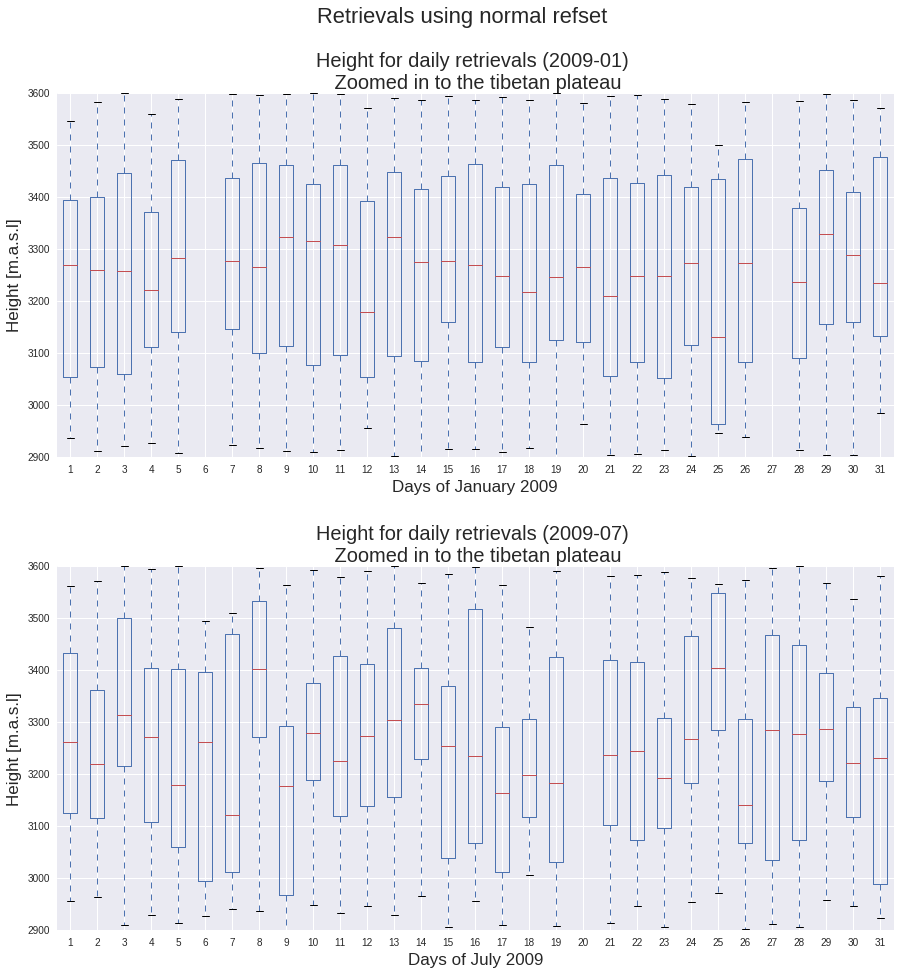

In [31]:
fig   = plt.figure(1,figsize=(15,15))

plot1 = days_height # days_height_k01
plot2 = days_height07 # days_height_k07

ax = fig.add_subplot(211)
plot1.plot(kind='box',ax=ax)
ax.set_ylabel('Height [m.a.s.l]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Height for daily retrievals (2009-01) \n Zoomed in to the tibetan plateau',fontsize=20)

ax = fig.add_subplot(212)
plot2.plot(kind='box',ax=ax)
ax.set_ylabel('Height [m.a.s.l]',fontsize=17)
ax.set_xlabel('Days of July 2009',fontsize=17)
ax.set_title('Height for daily retrievals (2009-07) \n Zoomed in to the tibetan plateau',fontsize=20)

plt.subplots_adjust(hspace=0.3)
fig.suptitle('Retrievals using normal refset',fontsize=22)

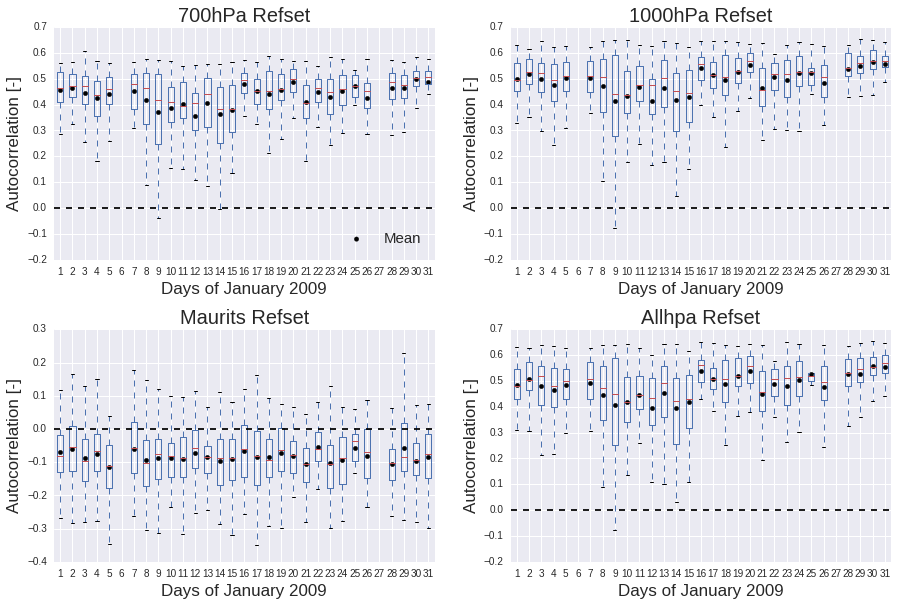

In [36]:
fig      = plt.figure(1,figsize=(15,15))

ax = fig.add_subplot(321)
days_autocorr.plot(kind='box',ax=ax)
means = days_autocorr.mean()
plt.scatter(means.index,means,label='Mean',color='k')
#ax.set_ylim(-1,10)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('700hPa Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')
plt.legend(loc='lower right',fontsize=15)

ax = fig.add_subplot(322)
days_autocorr_1000.plot(kind='box',ax=ax)
means = days_autocorr_1000.mean()
plt.scatter(means.index,means,color='k')
#ax.set_ylim(-1,60)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('1000hPa Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(323)
days_autocorr_k01.plot(kind='box',ax=ax)
means = days_autocorr_k01.mean()
plt.scatter(means.index,means,color='k')
#ax.set_ylim(-1,60)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Maurits Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(324)
days_autocorr_01_all.plot(kind='box',ax=ax)
means = days_autocorr_01_all.mean()
plt.scatter(means.index,means,color='k')
#ax.set_ylim(-1,60)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Allhpa Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')
plt.subplots_adjust(hspace=0.3)

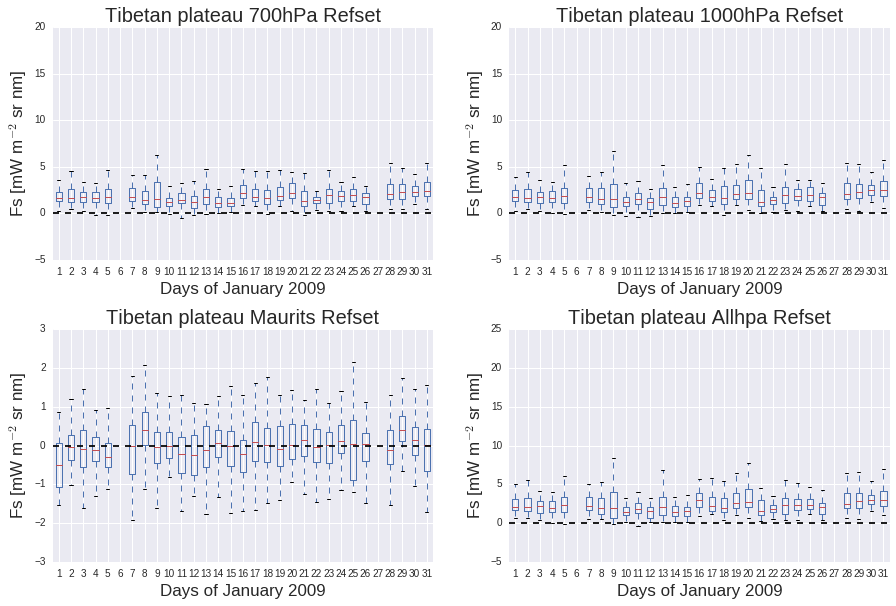

In [35]:
fig      = plt.figure(1,figsize=(15,15))

ax = fig.add_subplot(321)
days_fs.plot(kind='box',ax=ax)
#ax.set_ylim(-1,10)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Tibetan plateau 700hPa Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(322)
days_fs_1000.plot(kind='box',ax=ax)
#ax.set_ylim(-1,60)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Tibetan plateau 1000hPa Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(323)
days_fs_k01.plot(kind='box',ax=ax)
#ax.set_ylim(-1,60)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Tibetan plateau Maurits Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')
plt.subplots_adjust(hspace=0.3)

ax = fig.add_subplot(324)
days_fs_01_all.plot(kind='box',ax=ax)
#ax.set_ylim(-1,60)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Tibetan plateau Allhpa Refset',fontsize=20)
ax.axhline(0,color='k',linestyle='--')
plt.subplots_adjust(hspace=0.3)


#fig.savefig('/usr/people/botiabo/Notebooks_Scripts/Report/SIF_200901_stats.png',bbox_inches='tight',DPI=1000)
#fig.suptitle('Retrievals using 700 hPa Refset',fontsize=22)

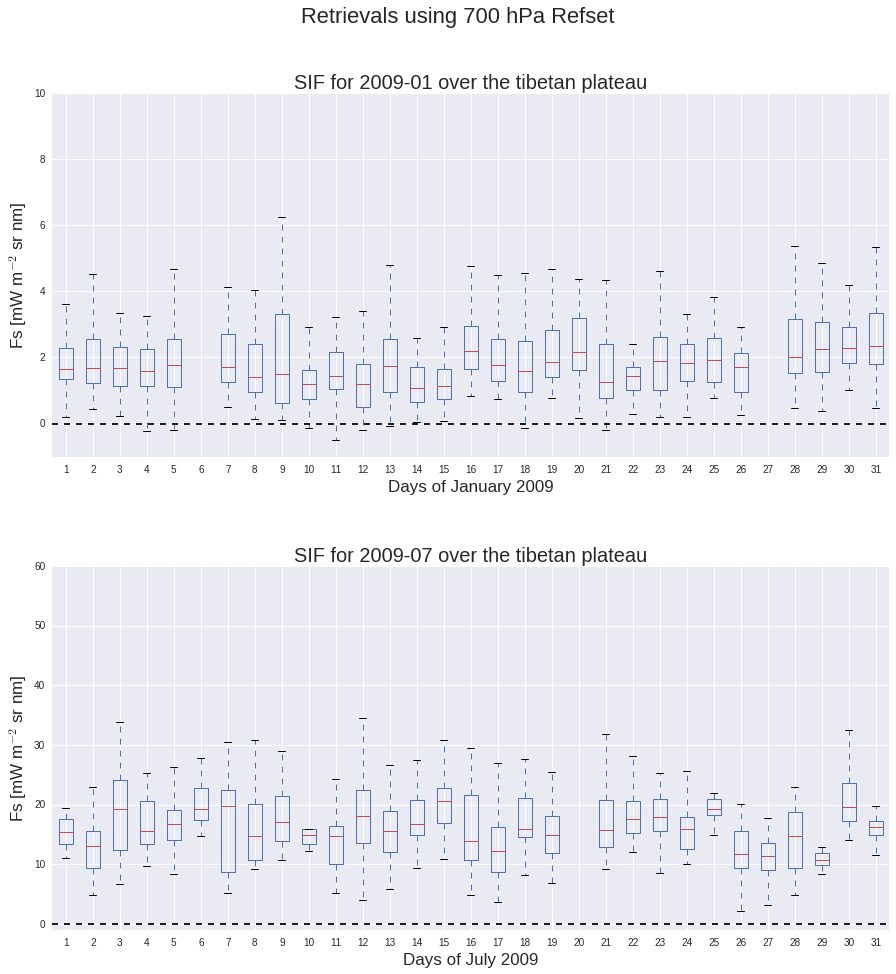

In [48]:
fig      = plt.figure(1,figsize=(15,15))

ax = fig.add_subplot(211)
days_fs.plot(kind='box',ax=ax)
ax.set_ylim(-1,10)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('SIF for 2009-01 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(212)
days_fs07.plot(kind='box',ax=ax)
ax.set_ylim(-1,60)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of July 2009',fontsize=17)
ax.set_title('SIF for 2009-07 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

plt.subplots_adjust(hspace=0.3)
fig.suptitle('Retrievals using 700 hPa Refset',fontsize=22)

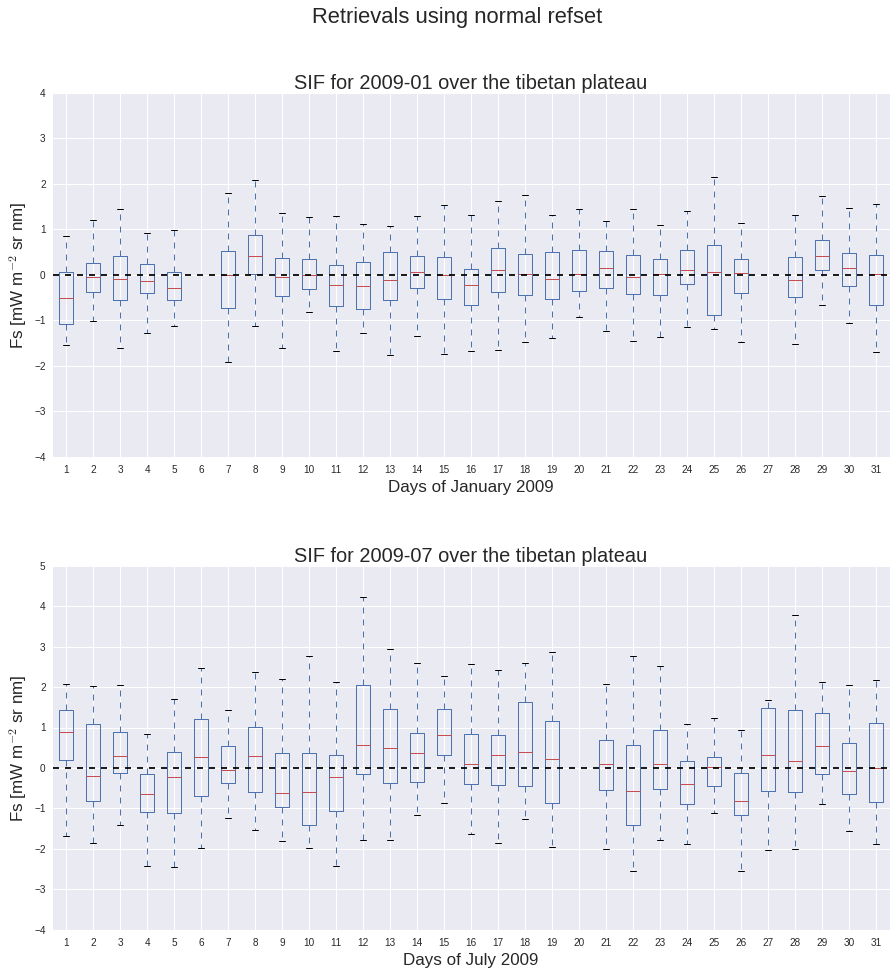

In [49]:
fig      = plt.figure(1,figsize=(15,15))

ax = fig.add_subplot(211)
days_fs_k01.plot(kind='box',ax=ax)
ax.set_ylim(-4,4)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('SIF for 2009-01 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(212)
days_fs_k07.plot(kind='box',ax=ax)
ax.set_ylim(-4,5)
ax.set_ylabel('Fs [mW m$^{-2}$ sr nm]',fontsize=17)
ax.set_xlabel('Days of July 2009',fontsize=17)
ax.set_title('SIF for 2009-07 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

plt.subplots_adjust(hspace=0.3)
fig.suptitle('Retrievals using normal refset',fontsize=22)

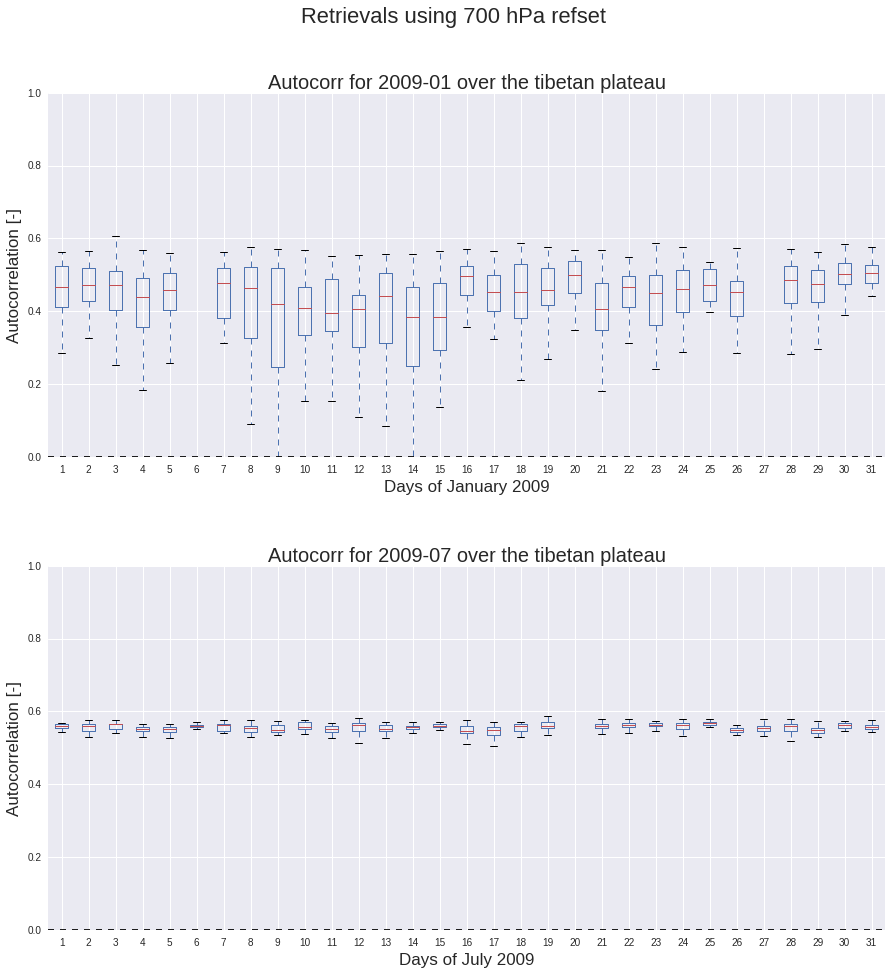

In [50]:
fig      = plt.figure(1,figsize=(15,15))

ax = fig.add_subplot(211)
days_autocorr.plot(kind='box',ax=ax)
ax.set_ylim(0,1)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Autocorr for 2009-01 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(212)
days_autocorr07.plot(kind='box',ax=ax)
ax.set_ylim(0,1)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of July 2009',fontsize=17)
ax.set_title('Autocorr for 2009-07 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

plt.subplots_adjust(hspace=0.3)
fig.suptitle('Retrievals using 700 hPa refset',fontsize=22)

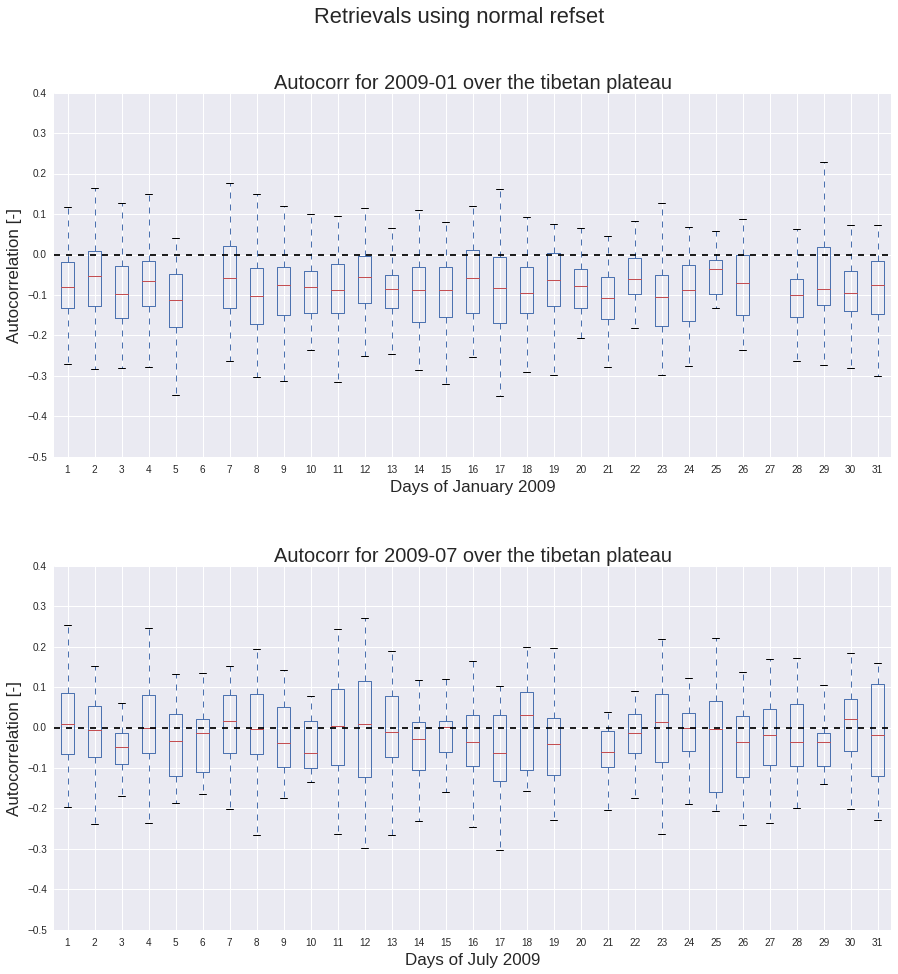

In [51]:
fig      = plt.figure(1,figsize=(15,15))

ax = fig.add_subplot(211)
days_autocorr_k01.plot(kind='box',ax=ax)
ax.set_ylim(-.5,0.4)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of January 2009',fontsize=17)
ax.set_title('Autocorr for 2009-01 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

ax = fig.add_subplot(212)
days_autocorr_k07.plot(kind='box',ax=ax)
ax.set_ylim(-.5,0.4)
ax.set_ylabel('Autocorrelation [-]',fontsize=17)
ax.set_xlabel('Days of July 2009',fontsize=17)
ax.set_title('Autocorr for 2009-07 over the tibetan plateau',fontsize=20)
ax.axhline(0,color='k',linestyle='--')

plt.subplots_adjust(hspace=0.3)
fig.suptitle('Retrievals using normal refset',fontsize=22)